# Double checking y-values

12th Apr

This notebook is for checking whether or not there's a difference in the y-scaling between the full D4 dataset and its tiny random subsample.

In [1]:
from unittest.mock import MagicMock

import pandas as pd

from dock2hit.utils import read_csv_or_pkl
from dock2hit.dataloader import load_data

mock_args = MagicMock()
mock_args.batch_size = 32
mock_args.y_col = 'dockscore'
mock_args.n_epochs = 1
mock_args.path_to_train_data = '/rds-d2/user/wjm41/hpc-work/datasets/Ugis/test/test_data/D4_test.csv'
mock_args.path_to_external_val = None
mock_args.random_train_val_split = False
mock_args.path_to_load_checkpoint = None

tiny_loader, _ = load_data(mock_args)

mock_args.path_to_train_data = '/rds-d2/user/wjm41/hpc-work/datasets/Ugis/datasets/ultra_large/D4_docked_valid.pkl'

big_loader, _ = load_data(mock_args)


INFO:rdkit:Enabling RDKit 2021.09.4 jupyter extensions
INFO:root:Loading dataset: /rds-d2/user/wjm41/hpc-work/datasets/Ugis/test/test_data/D4_test.csv
INFO:root:Length of dataset: 256.00
INFO:root:Length of training set: 256.00
INFO:root:Number of epochs to train: 1.00
INFO:root:Number of batches (size 32) per epoch: 8.00
INFO:root:Loading dataset: /rds-d2/user/wjm41/hpc-work/datasets/Ugis/datasets/ultra_large/D4_docked_valid.pkl
INFO:root:Length of dataset: 116.24M
INFO:root:Length of training set: 116.24M
INFO:root:Number of epochs to train: 1.00
INFO:root:Number of batches (size 32) per epoch: 3.63M


In [2]:
print(tiny_loader.y_scaler.mean_)
print(tiny_loader.y_scaler.scale_)

print(big_loader.y_scaler.mean_)
print(big_loader.y_scaler.scale_)


[-28.96882813]
[10.54171869]
[-28.46202165]
[10.95533626]


In [3]:
print(tiny_loader.df.describe())
print(big_loader.df.describe())


            index     dockscore
count  256.000000  2.560000e+02
mean   127.500000  1.613293e-16
std     74.045031  1.001959e+00
min      0.000000 -2.756777e+00
25%     63.750000 -5.882506e-01
50%    127.500000 -1.139446e-01
75%    191.250000  6.361703e-01
max    255.000000  4.828324e+00
          dockscore
count  1.162412e+08
mean  -1.947401e-15
std    1.000000e+00
min   -4.293613e+00
25%   -5.721393e-01
50%   -6.827525e-02
75%    4.565831e-01
max    4.306413e+01


In [4]:
print(tiny_loader.df)
print(big_loader.df)


     index                                             smiles  dockscore
0        0  CCCN1CC[C@H](NC(=O)C(=O)N2CCO[C@@H](CNC(C)=O)C...  -1.165007
1        1  C[C@H]1O[C@@H](C)[C@H](C)[C@H]1NC(=O)N(C)CCC(=O)O   2.629441
2        2           COC(=O)[C@H](C)CS(=O)(=O)N(CCO)Cc1cccnc1   1.015852
3        3        CCc1ccccc1[C@H](N)CNC(=O)[C@H](C)OCc1ccccc1  -0.272363
4        4              COCCO[C@H]1CCCN(c2cc(=O)n3ccccc3n2)C1  -0.357738
..     ...                                                ...        ...
251    251              CCN(C)[C@H](C(=O)Nc1cnn(C)c1)c1ccccc1  -0.944929
252    252        CN(Cc1nc(O)c2cc(Cl)ccc2n1)[C@H]1CCC[C@@H]1O  -1.692435
253    253  C[C@H](O)[C@H]1CCN(C(=O)c2cc(-c3ccn(C)c3)[nH]n...  -0.918368
254    254  COC(=O)c1[nH]c(C)c(C(=O)N[C@@H](C)[C@@H](O)C(F...   0.911505
255    255             O=C1CSCN1C/C(O)=N/[C@H]1CCCS(=O)(=O)C1   1.155298

[256 rows x 3 columns]
                                                      smiles  dockscore
0                           

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'dockscore'}>]], dtype=object)

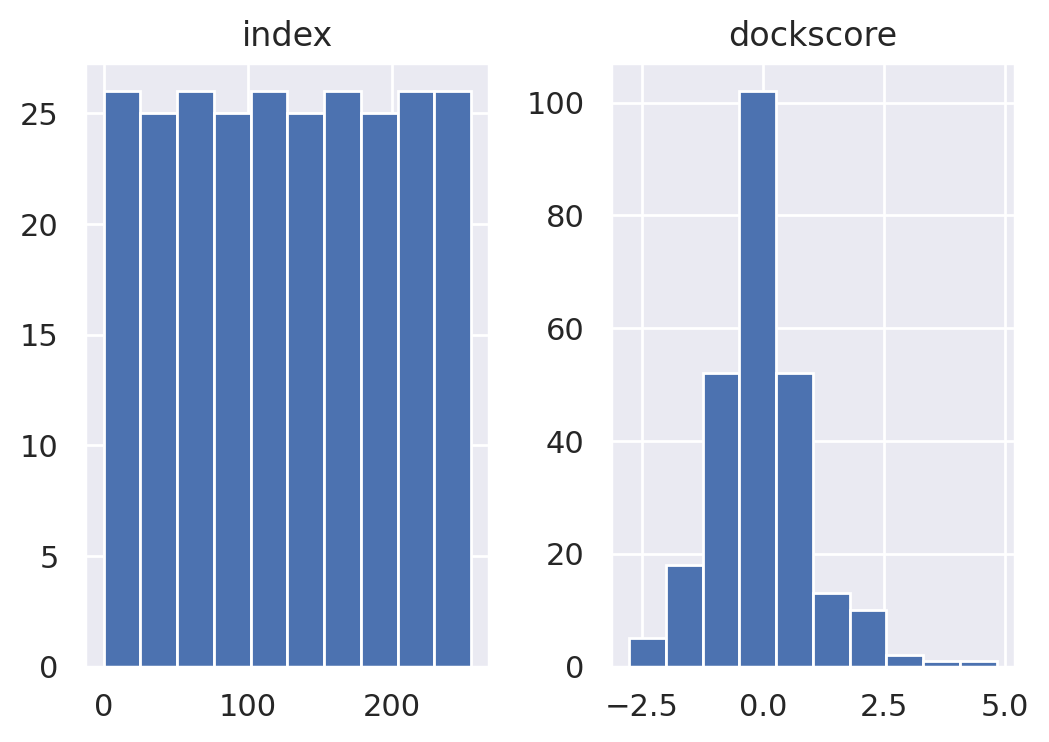

In [5]:
tiny_loader.df.hist()

array([[<AxesSubplot:title={'center':'dockscore'}>]], dtype=object)

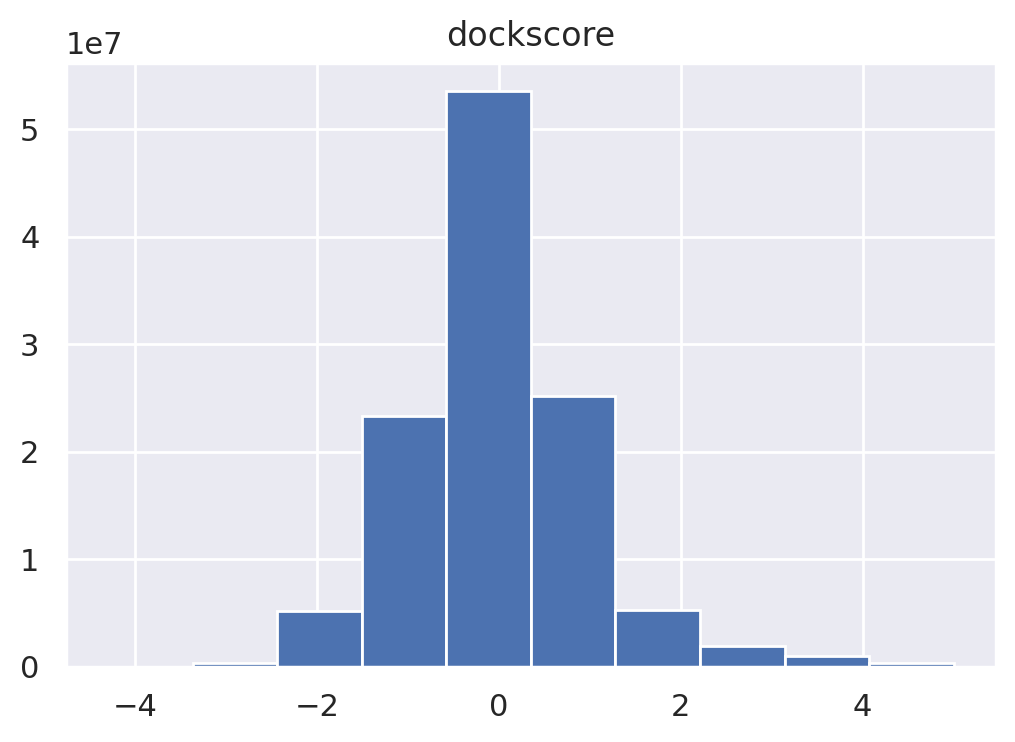

In [6]:
big_loader.df.query('dockscore < 5').hist()

In [8]:
import matplotlib.pyplot as plt

total_scores = []
for batch_num, (smiles, dockscore) in enumerate(big_loader):
    while batch_num < 10:
        print(dockscore)
        total_scores.append(dockscore)
    
plt.hist(total_scores)

In [ ]:
print(total_scores)